In [ ]:
### REAL ESTATE DATA ANALYSIS 
# Built from the RealEstate.mdf file compiled from *.CSV files downloaded from https://www.zillow.com/research/data/ .
# Additional tables built from within SQL.

# Current Tables (in use) within the database for this program (others are available, these are more streamlined): 
# -------------------------------
# AllThreeUnPivSalesPriceMo    *** Top, Mid & Bottom Tier SFR sales prices 
# ForecastSalesAvg2022         *** Projection of Top, Mid & Bottom Tier SFR sales prices by May of 2022
# Window_TMB                   ***Combination of Top, Mid & Bottom Tier Windowing tables ($$ Difference month over month) 
#   
# 
#          
#  ***Add rental rate table to database 


# *** First, in Anaconda promp run: "conda install -c anaconda pyodbc" to add pyodbc library to Jupyter Notebooks

# options to program for data isolation::: 
# ask for user input to guide through cmdLine menu for information library.
# 1) Question "What would you like to know?"
#    :::prompt user to type in a number index of their choice of the following options:
#        (1)=Avg Sales price change over time / (2)=Avg Sales price prediction 2022  

#  ***Add later      (3)=Avg Rental rate change over time / (4)=Avg Rental rate prediction 2022
# input_1 = input("What would you like to know? Type the number of the option that best fits your question and press enter.\n\n 1 = Avg Sales price change over time  2 = Avg Sales price prediction 2022 \n  3 = Avg Rental rate change over time \n 4 = Avg Rental rate prediction 2022 \n\n") 

# 2) Question: "What State would you like to know about?"
#    :::prompt user to type in state abbreviation or "all"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyodbc

In [2]:
pyodbc.drivers()

['SQL Server',
 'SQL Server Native Client 11.0',
 'SQL Server Native Client RDA 11.0',
 'ODBC Driver 17 for SQL Server']

In [6]:
cnxn_str = (
    r'DRIVER=SQL Server;'
    r'SERVER=(local)\MSSQLSERVER01;'
    r'Trusted_Connection=yes;'
    r'Database=RealEstate'
    #r'AttachedDbFileName=D:\SQL2019\MSSQLSERVER01\MSSQL\DATA\RealEstate.mdf;'
)
cnxn = pyodbc.connect(cnxn_str)
#df = pd.read_sql("SELECT * FROM sys.databases", cnxn)
#df

In [4]:
# Programming for user input data navigation prompt:
def mainmenu():
    input_1 = input("What would you like to know? Type the number of the option that best fits your question and press enter.\n\n 1 = Avg Sales price change over time  2 = Avg Sales price prediction 2022 \n\n")
    input_2 = input("What state would you like to know about? \n\n Type the two letter state abbreviation for state isolated metrics \n\n or \"all\" for national metrics.\n\n example: tx (not case sensitive) \n\n")
    if input_1 == "1" and input_2.lower() == "all":
        print( (pd.read_sql("SELECT * FROM Window_TMB", cnxn)) )
        input_0 = input("Type the number 0 and press enter to return to the main menu \n")
        if input_0 == "0":
            mainmenu()
        elif input_0 != "0":
            input("Invalid Input Error: Type the number 0 and press enter to return to the main menu \n")
            if input_0 == "0":
                mainmenu()
            elif input_0 != "0": 
                input("You're killing me. Type the number 0 and press enter to return to the main menu \n")
                if input_0 == "0":
                    mainmenu()
                elif input_0 != "0":
                    print("You killed me. (x__x) Just restart me already then.")
                    cnxn.close()
    elif input_1 == "1":
        print( (pd.read_sql("SELECT * FROM Window_TMB WHERE Lstate LIKE \'{}\'".format(input_2.upper()), cnxn)) )
        input_0 = input("Type the number 0 and press enter to return to the main menu \n")
        if input_0 == "0":
            mainmenu()   
        elif input_0 != "0":
            input("Invalid Input Error: Type the number 0 and press enter to return to the main menu \n")   
            if input_0 == "0":
                mainmenu()
            elif input_0 != "0": 
                input("You're killing me. Type the number 0 and press enter to return to the main menu \n")
                if input_0 == "0":
                    mainmenu()
                elif input_0 != "0":
                    print("You killed me. (x__x) Just restart me already then.")
                    cnxn.close()
    elif input_1 == "2" and input_2.lower() == "all":
        print( (pd.read_sql("SELECT * FROM ForecastSalesAvg2022", cnxn)) )
        input_0 = input("Type the number 0 and press enter to return to the main menu \n")
        if input_0 == "0":
            mainmenu()
        elif input_0 != "0":
            input("Invalid Input Error: Type the number 0 and press enter to return to the main menu \n")
            if input_0 == "0":
                mainmenu()
            elif input_0 != "0": 
                input("You're killing me. Type the number 0 and press enter to return to the main menu \n")
                if input_0 == "0":
                    mainmenu()
                elif input_0 != "0":
                    print("You killed me. (x__x) Just restart me already then.")
                    cnxn.close()
    elif input_1 == "2":
        print( (pd.read_sql("SELECT * FROM ForecastSalesAvg2022 WHERE Lstate LIKE \'{}\'".format(input_2.upper()), cnxn)) )
        input_0 = input("Type the number 0 and press enter to return to the main menu \n")
        if input_0 == "0":
            mainmenu()   
        elif input_0 != "0":
            input("Invalid Input Error: Type the number 0 and press enter to return to the main menu \n")   
            if input_0 == "0":
                mainmenu()
            elif input_0 != "0": 
                input("You're killing me. Type the number 0 and press enter to return to the main menu \n")
                if input_0 == "0":
                    mainmenu()
                elif input_0 != "0":
                    print("You killed me. (x__x) Just restart me already then.")
                    cnxn.close()
                    
                    
                    
                    
mainmenu() 

What would you like to know? Type the number of the option that best fits your question and press enter.

 1 = Avg Sales price change over time  2 = Avg Sales price prediction 2022 

1
What state would you like to know about? 

 Type the two letter state abbreviation for state isolated metrics 

 or "all" for national metrics.

 example: tx (not case sensitive) 

wy
    StateName Lstate        Date  TopValue  TopPriorMonth  TopDiffPrevMonth  \
0     Wyoming     WY  09-01-2009    334314       335317.0           -1003.0   
1     Wyoming     WY  01-01-2010    331270       331808.0            -538.0   
2     Wyoming     WY  06-01-2010    331836       331431.0             405.0   
3     Wyoming     WY  08-01-2010    331326       331685.0            -359.0   
4     Wyoming     WY  07-01-2011    326146       326561.0            -415.0   
..        ...    ...         ...       ...            ...               ...   
273   Wyoming     WY  05-01-1998    207508       206981.0             527.0   

In [7]:
# Converting each table in the database into individual pandas data frames:
# *** Excluding 'middle tier' 
input_2 = input("What state would you like to know about? \n\n Type the two letter state abbreviation for state isolated metrics \n\n or \"all\" for national metrics.\n\n example: tx (not case sensitive) \n\n")


df_WindowTMB = pd.read_sql("SELECT * FROM Window_TMB", cnxn)


df_ForecastSalesAvg2022_all = pd.read_sql("SELECT * FROM ForecastSalesAvg2022", cnxn)
df_ForecastSalesAvg2022_state = pd.read_sql("SELECT * FROM ForecastSalesAvg2022 WHERE Lstate LIKE \'{}\'".format(input_2.upper()), cnxn)



df_AllThreeUnPivSalesPriceMo = pd.read_sql("SELECT * FROM AllThreeUnPivSalesPriceMo", cnxn)


What state would you like to know about? 

 Type the two letter state abbreviation for state isolated metrics 

 or "all" for national metrics.

 example: tx (not case sensitive) 

tx


In [8]:
df_ForecastSalesAvg2022_all.head()

,Lstate,CityName,BottomTierProjection2022,MidTierProjection2022,TopTierProjection2022
0,AK,Hope,196621.024373,364278.180811,531935.337249
1,AK,Kasilof,195883.234236,362911.282995,529939.331753
2,AK,Sterling,194960.996785,361202.661132,527444.325479
3,AL,Adamsville,196989.919881,364961.630534,532933.341186
4,AL,Addison,195329.892293,361886.110855,528442.329416


In [9]:
# state and value definitions for Forecast Scatterplot
# *** "ALL" OPTION
fvalue1 = np.array(df_ForecastSalesAvg2022_all.BottomTierProjection2022)
fvalue2 = np.array(df_ForecastSalesAvg2022_all.MidTierProjection2022)
fvalue3 = np.array(df_ForecastSalesAvg2022_all.TopTierProjection2022)
fstate1 = np.array(df_ForecastSalesAvg2022_all.Lstate)
fcity1 = np.array(df_ForecastSalesAvg2022_all.CityName)

# *** "STATE" OPTION
fvalue4 = np.array(df_ForecastSalesAvg2022_state.BottomTierProjection2022)
fvalue5 = np.array(df_ForecastSalesAvg2022_state.MidTierProjection2022)
fvalue6 = np.array(df_ForecastSalesAvg2022_state.TopTierProjection2022)
fstate2 = np.array(df_ForecastSalesAvg2022_state.Lstate)
fcity2 = np.array(df_ForecastSalesAvg2022_state.CityName)

In [10]:
fvalue1

array([196621.02437303, 195883.23423635, 194960.99678537, ...,
       195883.23423635, 199203.28941168, 193669.8647058 ])

In [11]:
type(fvalue1)

numpy.ndarray

In [12]:
fstate1

array(['AK', 'AK', 'AK', ..., 'WY', 'WY', 'WY'], dtype=object)

In [13]:
type(fstate1)

numpy.ndarray

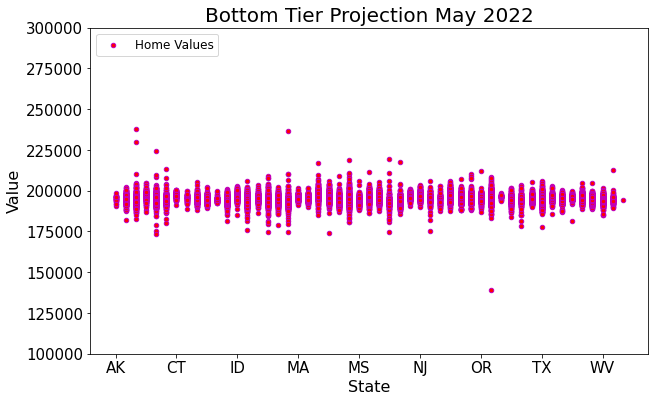

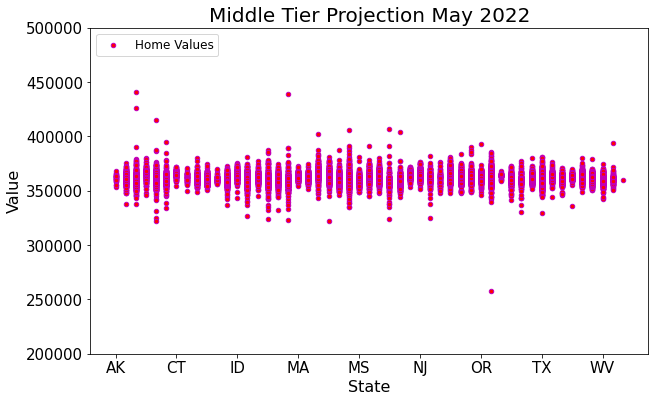

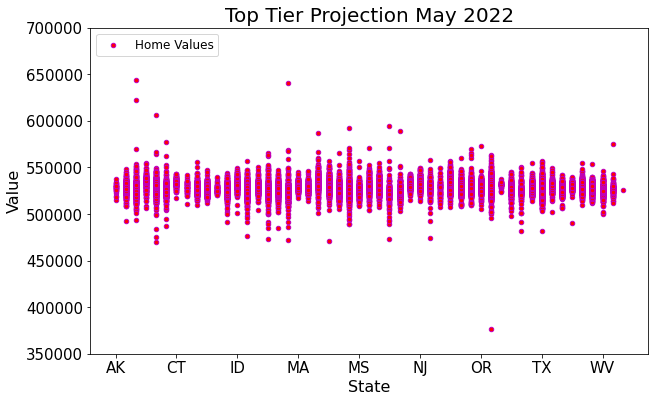

In [14]:
# *** "ALL" OPTION
# move below plt construct code under respective "elif" statement in the mainmenu() function:
# this scatterplot is for the 2022 price projection, X-axis value is State
# from df_ForecastSalesAvg2022_all

# Bottom Tier
plt.figure(figsize=(10,6))
plt.title("Bottom Tier Projection May 2022",fontsize=20)
plt.xlabel("State",fontsize=16)
plt.ylabel("Value",fontsize=16)
plt.grid (False)
plt.ylim(100000,300000)
plt.xticks([i*6 for i in range(10)],fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(x=fstate1 , y=fvalue1 , c='red' , s=20 , edgecolors='m')
#plt.text(x=30,y=45,s="Weights are more or less similar \nafter 18-20 years of age",fontsize=15)
plt.vlines(x=40,ymin=0,ymax=100,linestyles='dashed',color='k',lw=3)
plt.legend(['Home Values'],loc=2,fontsize=12)
plt.show()


# Middle Tier
plt.figure(figsize=(10,6))
plt.title("Middle Tier Projection May 2022",fontsize=20)
plt.xlabel("State",fontsize=16)
plt.ylabel("Value",fontsize=16)
plt.grid (False)
plt.ylim(200000,500000)
plt.xticks([i*6 for i in range(10)],fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(x=fstate1 , y=fvalue2 , c='red' , s=20 , edgecolors='m')
#plt.text(x=30,y=45,s="Weights are more or less similar \nafter 18-20 years of age",fontsize=15)
plt.vlines(x=40,ymin=0,ymax=100,linestyles='dashed',color='k',lw=3)
plt.legend(['Home Values'],loc=2,fontsize=12)
plt.show()


# Top Tier
plt.figure(figsize=(10,6))
plt.title("Top Tier Projection May 2022",fontsize=20)
plt.xlabel("State",fontsize=16)
plt.ylabel("Value",fontsize=16)
plt.grid (False)
plt.ylim(350000,700000)
plt.xticks([i*6 for i in range(10)],fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(x=fstate1 , y=fvalue3 , c='red' , s=20 , edgecolors='m')
#plt.text(x=30,y=45,s="Weights are more or less similar \nafter 18-20 years of age",fontsize=15)
plt.vlines(x=40,ymin=0,ymax=100,linestyles='dashed',color='k',lw=3)
plt.legend(['Home Values'],loc=2,fontsize=12)
plt.show()

What state would you like to know about? 

 Type the two letter state abbreviation for state isolated metrics 

 or "all" for national metrics.

 example: tx (not case sensitive) 

Ca


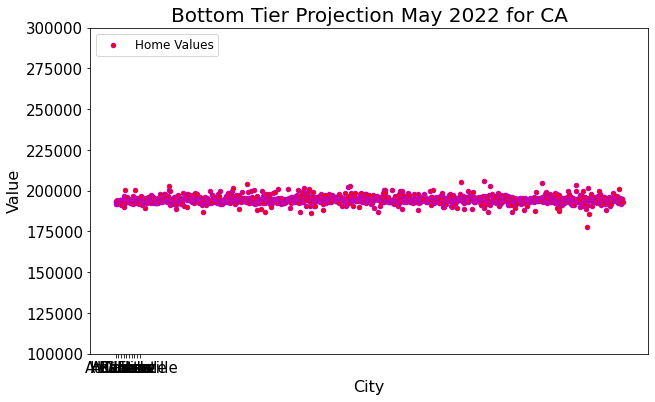

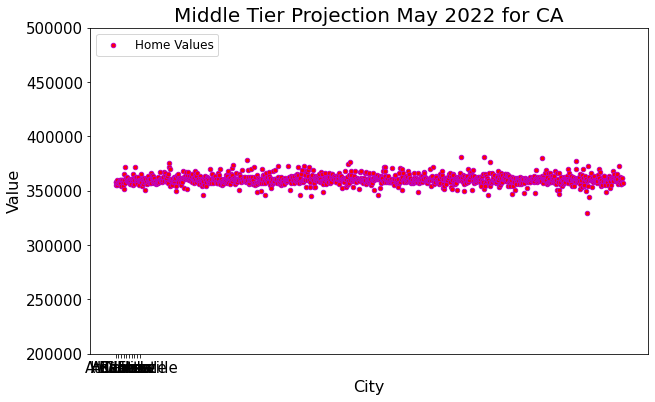

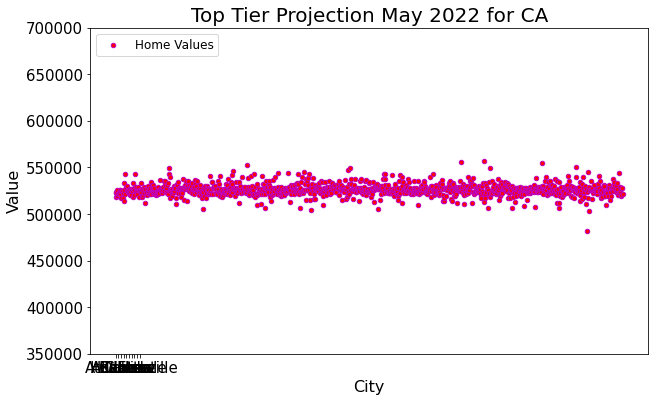

In [15]:
# *** "STATE" OPTION

# this scatterplot is for the 2022 price projection, X-axis value is State
# from df_ForecastSalesAvg2022_all

input_2 = input("What state would you like to know about? \n\n Type the two letter state abbreviation for state isolated metrics \n\n or \"all\" for national metrics.\n\n example: tx (not case sensitive) \n\n")

# Bottom Tier
plt.figure(figsize=(10,6))
plt.title("Bottom Tier Projection May 2022 for {}".format(input_2.upper()),fontsize=20)
plt.xlabel("City",fontsize=16)
plt.ylabel("Value",fontsize=16)
plt.grid (False)
plt.ylim(100000,300000)
plt.xticks([i*6 for i in range(10)],fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(x=fcity2 , y=fvalue4 , c='red' , s=20 , edgecolors='m')
#plt.text(x=30,y=45,s="Weights are more or less similar \nafter 18-20 years of age",fontsize=15)
plt.vlines(x=40,ymin=0,ymax=100,linestyles='dashed',color='k',lw=3)
plt.legend(['Home Values'],loc=2,fontsize=12)
plt.show()


# Middle Tier
plt.figure(figsize=(10,6))
plt.title("Middle Tier Projection May 2022 for {}".format(input_2.upper()),fontsize=20)
plt.xlabel("City",fontsize=16)
plt.ylabel("Value",fontsize=16)
plt.grid (False)
plt.ylim(200000,500000)
plt.xticks([i*6 for i in range(10)],fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(x=fcity2 , y=fvalue5 , c='red' , s=20 , edgecolors='m')
#plt.text(x=30,y=45,s="Weights are more or less similar \nafter 18-20 years of age",fontsize=15)
plt.vlines(x=40,ymin=0,ymax=100,linestyles='dashed',color='k',lw=3)
plt.legend(['Home Values'],loc=2,fontsize=12)
plt.show()


# Top Tier
plt.figure(figsize=(10,6))
plt.title("Top Tier Projection May 2022 for {}".format(input_2.upper()),fontsize=20)
plt.xlabel("City",fontsize=16)
plt.ylabel("Value",fontsize=16)
plt.grid (False)
plt.ylim(350000,700000)
plt.xticks([i*6 for i in range(10)],fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(x=fcity2 , y=fvalue6 , c='red' , s=20 , edgecolors='m')
#plt.text(x=30,y=45,s="Weights are more or less similar \nafter 18-20 years of age",fontsize=15)
plt.vlines(x=40,ymin=0,ymax=100,linestyles='dashed',color='k',lw=3)
plt.legend(['Home Values'],loc=2,fontsize=12)
plt.show()

In [ ]:
# state and date definitions for Change over Time (Window_TMB) Scatterplot



In [ ]:
# move below plt construct code under respective "elif" statement in the mainmenu() function:

# this one is for the sales prices over time, X-axis value is Date
# from the Window_TMB table
date = 
value = 

plt.figure(figsize=(10,6))
plt.title("Change in price over time",fontsize=20)
plt.xlabel("Date",fontsize=16)
plt.ylabel("Value",fontsize=16)
plt.grid (False)
plt.ylim(10,100)
plt.xticks([i*6 for i in range(10)],fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(x=date , y=value , c='red' , s=150 , edgecolors='m')
#plt.text(x=30,y=45,s="Weights are more or less similar \nafter 18-20 years of age",fontsize=15)
plt.vlines(x=20,ymin=0,ymax=100,linestyles='dashed',color='k',lw=3)
plt.legend(['Home Values'],loc=2,fontsize=12)
plt.show()

In [ ]:
cnxn.close()